In [6]:
import tensorflow as tf
import numpy as np
import cv2
import os
import pandas as pd
from tqdm import tqdm
import pickle
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [8]:
with open("dataset_labels.pkl", "rb")  as f:
    data = pickle.load(f)

In [9]:
train_path = "dataset/train"
val_path  = "dataset/val"

train_labels = {}
val_labels = {}
for p in os.listdir(train_path):
    train_labels[p] = data[p]
    
for p in os.listdir(val_path):
    val_labels[p] = data[p]

In [10]:
column = []
idx = {}
char = ["A", "B", "C", "D"]
l = 2
column.append("id")
column.append("label")
for i in range(50):
    for j in range(4):
        s = str(i+1)+str(char[j])
        idx[s] = l
        l+=1
        column.append(s)    

In [6]:
column = np.array(column)
column.shape

(202,)

In [11]:
arr = ["", []]
for _ in range(200):
    arr.append(0)
print(arr)

['', [], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


d = []
cr = ["A", "B", "C", "D"]
for image_id, label in tqdm(val_labels.items()):
#     print(image_id, label)
    arr = ["", []]
    for _ in range(200):
        arr.append(0)
    k = arr
    k[0] = image_id
    k[1] = label
    c = 1
    for i in label:
        s = str(c) + cr[i-1]
        k[idx[s]] = 1
        c+=1
    d.append(k)

val_dataset = pd.DataFrame(d, columns=column)

In [12]:
d = []
cr = ["A", "B", "C", "D"]
for image_id, label in tqdm(val_labels.items()):
    arr = ["", []]
    for _ in range(200):
        arr.append(0)
    k = arr
    k[0] = image_id
    k[1] = label
    c = 1
    for i in label:
        s = str(c) + cr[i-1]
        k[idx[s]] = 1
        c+=1
    d.append(k)
    
val_dataset = pd.DataFrame(d, columns=column)
    
d = []
for image_id, label in tqdm(train_labels.items()):
    arr = ["", []]
    for _ in range(200):
        arr.append(0)
    k = arr
    k[0] = image_id
    k[1] = label
    c = 1
    for i in label:
        s = str(c) + cr[i-1]
        k[idx[s]] = 1
        c+=1
    d.append(k)
    
train_dataset = pd.DataFrame(d, columns=column)

100%|███████████████████████████████████████████████████████████████████████████| 7490/7490 [00:00<00:00, 15768.57it/s]


In [13]:
train_dataset.head()

,id,label,1A,1B,1C,1D,2A,2B,2C,2D,...,48C,48D,49A,49B,49C,49D,50A,50B,50C,50D
0,2510.png,"[3, 3, 4, 4, 3, 4, 3, 1, 3, 3, 4, 3, 3, 2, 3, ...",0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,2511.png,"[1, 2, 2, 2, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 4, ...",1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
2,2512.png,"[4, 4, 3, 2, 4, 2, 3, 1, 4, 2, 4, 2, 3, 2, 4, ...",0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3,2513.png,"[1, 1, 3, 2, 1, 4, 1, 4, 4, 1, 2, 4, 4, 1, 3, ...",1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2514.png,"[1, 2, 2, 4, 3, 1, 3, 1, 4, 1, 3, 4, 4, 4, 2, ...",1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0


In [14]:
img_width = 200
img_height = 100
img = cv2.imread("dataset/val/0.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (img_width, img_height))
cv2.imshow("w", img)
cv2.waitKey(0)

-1

In [7]:
img_width = 200
img_height = 100
train = []

print("Training set getting ready!")
for i in tqdm(range(train_dataset.shape[0])):
    path = "dataset/train/"+train_dataset["id"][i]
#     img = image.load_img(path, target_size=(img_width, img_height))
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (img_width, img_height))
    cv2.imshow(img)
    cv2.waitKey(0)
    break
    img = img / 255.0
    img = tf.expand_dims(img, axis=-1)
    train.append(img)
    

Training set getting ready!


NameError: name 'train_dataset' is not defined

In [15]:
img_width = 200
img_height = 100
train = []

print("Training set getting ready!")
for i in tqdm(range(train_dataset.shape[0])):
    path = "dataset/train/"+train_dataset["id"][i]
#     img = image.load_img(path, target_size=(img_width, img_height))
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (img_width, img_height))
    img = img / 255.0
    img = tf.expand_dims(img, axis=-1)
    train.append(img)
    
train = np.array(train)


print("Validation set getting ready!")
val = []

for i in tqdm(range(val_dataset.shape[0])):
    path = "dataset/val/"+val_dataset["id"][i]
#     img = image.load_img(path, target_size=(img_width, img_height))
#     img = image.img_to_array(img)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (img_width, img_height))
    img = img / 255.0
#     img = np.expand_dims(img, axis = 1)
    img = tf.expand_dims(img, axis=-1)
    val.append(img)
    
val = np.array(val)

print(val.shape)
print(train.shape)


  0%|                                                                                         | 0/7490 [00:00<?, ?it/s]

Training set getting ready!


  1%|▌                                                                              | 17/2510 [00:00<00:15, 163.08it/s]

Validation set getting ready!


100%|█████████████████████████████████████████████████████████████████████████████| 2510/2510 [00:15<00:00, 165.78it/s]


(2510, 100, 200, 1)
(7490, 100, 200, 1)


In [ ]:
train[0].shape

In [16]:
train_y = train_dataset.drop(['id', 'label'], axis = 1)
train_y = train_y.to_numpy()
print(train_y.shape)

val_y = val_dataset.drop(['id', 'label'], axis = 1)
val_y = val_y.to_numpy()
print(val_y.shape)

(7490, 200)
(2510, 200)


In [17]:
dataset = {"train_x":train, "train_y":train_y, "val_x":val, "val_y":val_y}

In [18]:
with open("master_dataset.pkl", "wb") as file:
    pickle.dump(dataset, file)

In [3]:
with open("master_dataset.pkl", "rb") as file:
    dataset = pickle.load(file)

In [4]:
train_x, train_y, val_x, val_y = dataset["train_x"], dataset["train_y"], dataset["val_x"], dataset["val_y"]

In [5]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

(7490, 100, 200, 1)
(7490, 200)
(2510, 100, 200, 1)
(2510, 200)


In [6]:
train_x[0].shape

(100, 200, 1)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation = 'relu', input_shape = train_x[0].shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, 3, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(256, 3, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(512, 3, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.6),
    
    tf.keras.layers.Conv2D(1024, 3, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.6),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(200, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 198, 32)       320       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 198, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 99, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 97, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 97, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 48, 64)        0

In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [9]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y, batch_size=2, epochs=50, validation_data=(val_x, val_y))

Epoch 1/50
3745/3745 [==============================] - 123s 33ms/step - loss: 0.5664 - accuracy: 0.0049 - val_loss: 5.9376 - val_accuracy: 0.0000e+00
Epoch 2/50
3745/3745 [==============================] - 123s 33ms/step - loss: 0.5645 - accuracy: 0.0036 - val_loss: 6.2130 - val_accuracy: 0.0000e+00
Epoch 3/50
3745/3745 [==============================] - 122s 32ms/step - loss: 0.5635 - accuracy: 0.0023 - val_loss: 6.3915 - val_accuracy: 0.0000e+00
Epoch 4/50
3745/3745 [==============================] - 119s 32ms/step - loss: 0.5630 - accuracy: 0.0000e+00 - val_loss: 6.5866 - val_accuracy: 0.0000e+00
Epoch 5/50
3745/3745 [==============================] - 116s 31ms/step - loss: 0.5627 - accuracy: 6.6756e-04 - val_loss: 6.6445 - val_accuracy: 0.0000e+00
Epoch 6/50
3745/3745 [==============================] - 116s 31ms/step - loss: 0.5626 - accuracy: 0.0028 - val_loss: 6.9711 - val_accuracy: 0.0000e+00
Epoch 7/50
3745/3745 [==============================] - 116s 31ms/step - loss: 0.5625 

In [ ]:
columns = train_dataset.columns
columns = np.array(columns)
columns.shape

In [ ]:
img_width = 150
img_height = 150
img = cv2.imread("dataset/val/620.png")
copy_image = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (img_width, img_height))
img = img / 255.0

#     img = np.expand_dims(img, axis = 1)
img = tf.expand_dims(img, axis=-1)
img = np.expand_dims(img, axis = 0)
proba = model.predict(img)
proba = np.array(proba)
top_5 = np.argsort(proba[0])[:-6:-1]
print(top_5)
for i in range(1):
    k = sorted(columns[top_5 + 2])
    print(k, proba[0][top_5])
plt.imshow(copy_image)

In [ ]:
img = cv2.imread("dataset/train/2400.png")
img = cv2.resize(img, (150,150))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img / 255.0
img = tf.expand_dims(img, axis = 0)

In [ ]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    print(layer.name, layer.output.shape)

In [ ]:
model_first_conv = Model(inputs = model.inputs, outputs = model.layers[3].output)
feature_maps = model_first_conv.predict(img)
fig,ax = plt.subplots(2,8,figsize=(20,20))
ix = 0
for i in range(2):
    for j in range(8):
        img = feature_maps[0, :, :, ix]
        ax[i,j].set_xticklabels([])
        ax[i,j].set_yticklabels([])
        ax[i,j].set_aspect('equal')
        ax[i,j].imshow(img, cmap = "gray")
#         ax[i,j].get_xaxis().set_visible(False)
#         ax[i,j].get_yaxis().set_visible(False)
#         ax[i,j].
        ix+=1

In [ ]:
resnet = tf.keras.applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= train_x[0].shape)
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
from tensorflow.keras import Model
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(200, activation= 'sigmoid')(x)
model = Model(inputs = resnet.input, outputs = predictions)
model.compile(optimizer='Adam', loss = 'binary_crossentropy')

In [ ]:
model.fit(train_x, train_y, epochs = 50, validation_data=(val_x, val_y))

In [3]:
model = tf.keras.models.load_model("resnet_35Epoch")

In [4]:
column = []
idx = {}
char = ["A", "B", "C", "D"]
l = 2
column.append("id")
column.append("label")
for i in range(50):
    for j in range(4):
        s = str(i+1)+str(char[j])
        idx[s] = l
        l+=1
        column.append(s)    

In [5]:
idx_inv = {}
for k, v in idx.items():
    idx_inv[v] = k

2 1C
4 2A
10 3C
13 4B
16 5A
22 6C
25 7B
30 8C
33 9B
38 10C
43 11D
45 12B
50 13C
52 14A
58 15C
61 16B
66 17C
71 18D
73 19B
77 20B
82 21C
87 22D
88 23A
95 24D
97 25B
102 26C
106 27C
111 28D
114 29C
119 30D
121 31B
125 32B
131 33D
133 34B
138 35C
140 36A
146 37C
151 38D
154 39C
157 40B
163 41D
165 42B
168 43A
174 44C
178 45C
180 46A
186 47C
189 48B
192 49A
196 50A


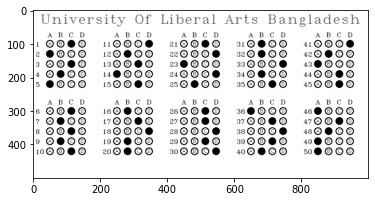

In [7]:
import cv2
img_width = 200
img_height = 100
img = cv2.imread("dataset/val/0.png")
copy_image = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (img_width, img_height))
img = img / 255.0

#     img = np.expand_dims(img, axis = 1)
img = tf.expand_dims(img, axis=-1)
img = np.expand_dims(img, axis = 0)
proba = model.predict(img)
proba = np.array(proba)
top_5 = np.argsort(proba[0])[:-51:-1]
# print(top_5)
top_5 = sorted(top_5)
idx_inv = {}
for k, v in idx.items():
    idx_inv[v] = k

for i in top_5:
    print(i, idx_inv[i+2])

plt.imshow(copy_image)

In [ ]:

# proba[0].shape